In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Configure matplotlib for better-looking plots
plt.style.use("custom_plt_sytle.mplstyle")

In [21]:
# Specify the experiment directory (update this to your experiment timestamp)
# Find latest experiment: !ls -td fio_io/2*/ | head -1
experiment_dir = 'fio_io/20251005_003010'  # Update this path

# Read the CSV file from the experiment directory
df = pd.read_csv(f'{experiment_dir}/fio_io_bandwidth.csv')
df.head()

,timestamp,workload,threads,bs,iodepth,ioengine,size,runtime,read_bw_bytes,write_bw_bytes,total_bw_bytes,read_bw_mib_s,write_bw_mib_s,total_bw_mib_s,json_path
0,20251005_003010,randrw,1,64k,1,psync,10G,60,235118496,235051869,470170365,224.226471,224.162930,448.389401,logs/fio_io/20251005_003010/randrw_threads1.json
1,20251005_003010,randrw,2,64k,1,psync,10G,60,343979623,344688493,688668116,328.044532,328.720563,656.765095,logs/fio_io/20251005_003010/randrw_threads2.json
2,20251005_003010,randrw,4,64k,1,psync,10G,60,482433341,482849474,965282815,460.084287,460.481142,920.565429,logs/fio_io/20251005_003010/randrw_threads4.json
3,20251005_003010,randrw,8,64k,1,psync,10G,60,568021991,567332794,1135354785,541.707984,541.050714,1082.758698,logs/fio_io/20251005_003010/randrw_threads8.json
4,20251005_003010,randrw,12,64k,1,psync,10G,60,574449510,573477409,1147926919,547.837744,546.910676,1094.748420,logs/fio_io/20251005_003010/randrw_threads12.json


In [22]:
# Calculate per-thread bandwidth
df['per_thread_bw_mib_s'] = df['total_bw_mib_s'] / df['threads']

# Display the data
print(df[['threads', 'total_bw_mib_s', 'per_thread_bw_mib_s']])

   threads  total_bw_mib_s  per_thread_bw_mib_s
0        1      448.389401           448.389401
1        2      656.765095           328.382547
2        4      920.565429           230.141357
3        8     1082.758698           135.344837
4       12     1094.748420            91.229035
5       16     1092.148463            68.259279
6       20     1112.578538            55.628927
7       24     1103.457326            45.977389
8       28     1110.547597            39.662414
9       32     1116.107883            34.878371


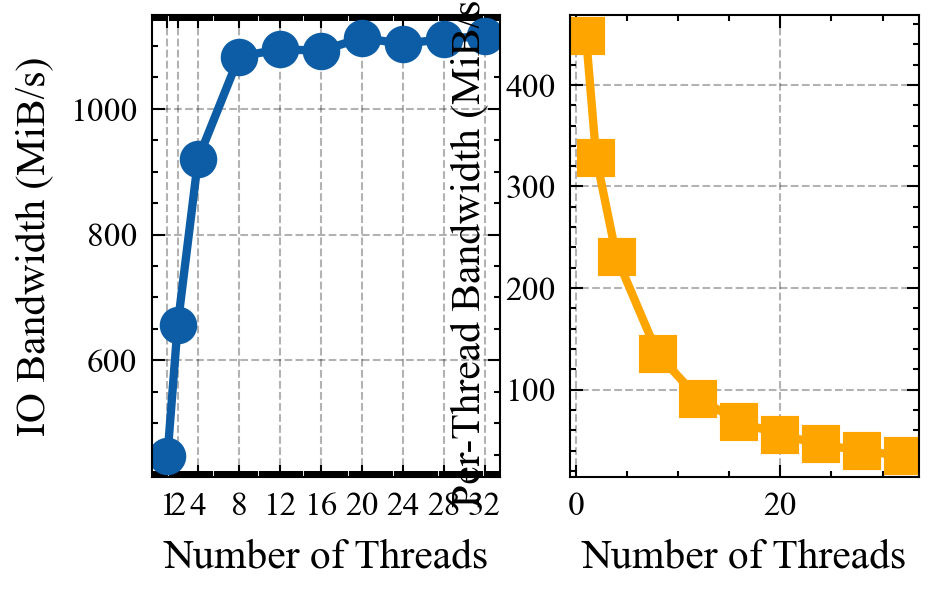

In [ ]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot 1: Total IO Bandwidth
ax1.plot(df['threads'], df['total_bw_mib_s'], marker='o', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Threads')
ax1.set_ylabel('IO Bandwidth (MiB/s)')
# ax1.set_title('Total IO Bandwidth vs Number of Threads', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(df['threads'])

# Plot 2: Per-Thread Bandwidth
ax2.plot(df['threads'], df['per_thread_bw_mib_s'], marker='s', color='orange', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Threads')
ax2.set_ylabel('Per-Thread Bandwidth (MiB/s)')
# ax2.set_title('Per-Thread IO Bandwidth vs Number of Threads', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(df['threads'])

plt.show()

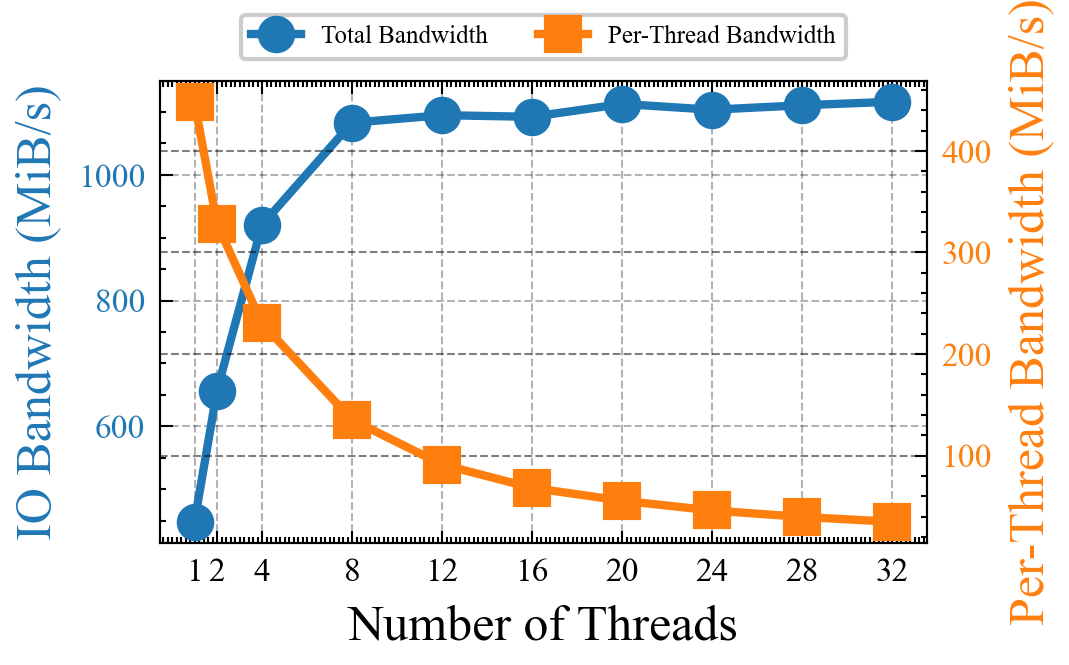

In [32]:
# Combined plot with dual y-axes
fig, ax1 = plt.subplots()

# Plot total bandwidth on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Number of Threads', fontsize=12)
ax1.set_ylabel('IO Bandwidth (MiB/s)', color=color, fontsize=12)
line1 = ax1.plot(df['threads'], df['total_bw_mib_s'], marker='o', color=color, 
                 linewidth=2, markersize=8, label='Total Bandwidth')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(df['threads'])

# Plot per-thread bandwidth on secondary y-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Per-Thread Bandwidth (MiB/s)', color=color, fontsize=12)
line2 = ax2.plot(df['threads'], df['per_thread_bw_mib_s'], marker='s', color=color, 
                 linewidth=2, markersize=8, label='Per-Thread Bandwidth')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.17), ncols=2)

# plt.title('IO Bandwidth Scaling with Thread Count', fontsize=14, fontweight='bold')
# plt.tight_layout()
plt.show()